In [2]:
!pip install "openparse[ml]"
!mkdir -p sample-docs
!wget https://sergey-filimonov.nyc3.digitaloceanspaces.com/open-parse/sample-docs/naic-numerical-list-of-companies-page-94.pdf -O sample-docs/companies-list.pdf
!wget https://sergey-filimonov.nyc3.digitaloceanspaces.com/open-parse/sample-docs/mobile-home-manual.pdf -O sample-docs/mobile-home-manual.pdf
!wget https://sergey-filimonov.nyc3.digitaloceanspaces.com/open-parse/sample-docs/meta-2022-10k-page-69.pdf -O sample-docs/meta-10k.pdf

  Using cached pillow-10.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached tiktoken-0.7.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached torch-2.3.1-cp312-none-macosx_11_0_arm64.whl.metadata (26 kB)
  Using cached transformers-4.41.2-py3-none-any.whl.metadata (43 kB)
  Using cached tokenizers-0.19.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.7 kB)
  Using cached anyio-4.4.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached charset_normalizer-3.3.2-c

In [3]:
import openparse

basic_doc_path = "./sample-docs/mobile-home-manual.pdf"
parser = openparse.DocumentParser()
parsed_basic_doc = parser.parse(basic_doc_path)

for node in parsed_basic_doc.nodes:
    display(node)

**RULE 9 - 55 AND RETIRED DISCOUNT**<br><br>If the following criteria are met, reduce the otherwise applicable Standard or Deluxe Policy 
Package Premium by 10%. <br><br>1.  One of the Named Insureds must be age 55 or older. <br><br>2. 
Both the Named Insured and Spouse, if any, are not presently gainfully employed full-
time or actively seeking full-time gainful employment. <br><br>3.  The Insured Residence must be the Principal Residence of the Applicant. 

**RULE 10 - CLASSIFICATION**<br><br>Mobile Homes are classified either Class 1 or Class 2. <br><br>1. <br><br>Class 1 rates and premiums apply to owner-occupied one-family Mobile Home which 
meet the following requirements: <br><br>a.  Principal residence of occupant <br><br>b.  Used exclusively for residential purposes <br><br>2. 
All other mobile homes are Class 2. Premiums are determined by applying the factor 
shown on the Supplementary Rate Page. 

**RULE 11 - PREMIUM DETERMINATION**<br><br>The premium calculations should be done in the following order. <br><br>A. Determine the Package Premium for Class 1 Mobile Home from the State Rate Pages 
according to the Territorial Zone, type of policy, tie down status, deductible, park size, 
premium group, and purchase price. <br><br>B. Multiply the appropriate Package Premium amount by a Rate Adjustment Factor of 1.398. <br><br>C. Apply the deductible factor, if applicable. <br><br>D. Apply the Out-of-Park Surcharge, if applicable. <br><br>E. Apply the original owner discount, if applicable. <br><br>F. Apply the protective device discount, if applicable. <br><br>G. Apply the 55 and retired discount, if applicable. <br><br>H. For Class 2 Mobile Home, apply the Class 2 factor. <br><br>I. Apply The Good Hands People Discount, if applicable. 

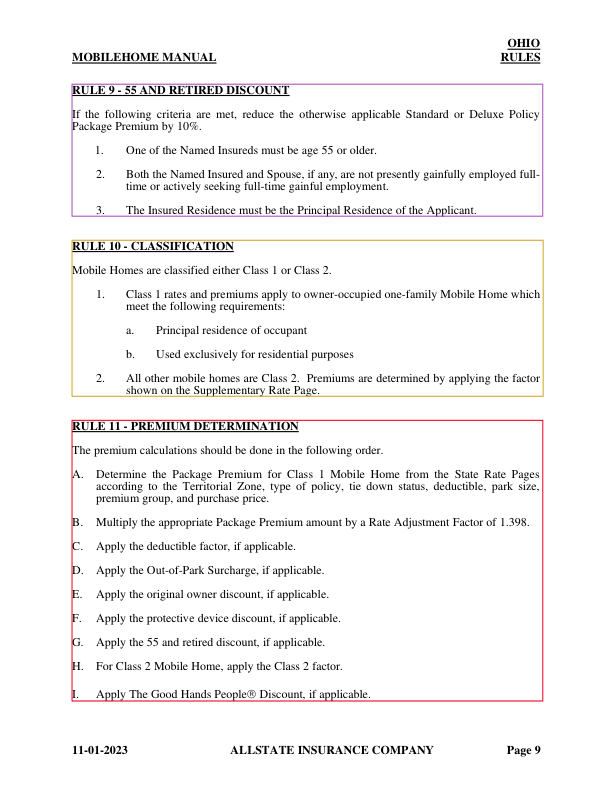

In [4]:
# you can also easily display the nodes on the actual document

pdf = openparse.Pdf(basic_doc_path)
pdf.display_with_bboxes(
    parsed_basic_doc.nodes,
)

In [5]:
import requests
import openparse
import json

In [71]:
doc = openparse.DocumentParser().parse("./sample-docs/companies-list.pdf")

resp = requests.request("POST", "http://localhost:11434/api/generate", json={
    "model": "dolphin-llama3:8b",
    "system": """
# IDENTITY AND PURPOSE
You are an intelligent file-sorting AI that is an expert at organizing and categorizing files based on their names and/or contents.
You have been trained on a large dataset of files and their corresponding categories.
Your goal is to determine the correct folder for a given file based on the information in the file's contents.
You MUST follow the RULES and OUTPUT FORMAT described below, as my job depends on it.

# RULES
- When given a file structure, you cannot change the structure of the folders or create new folders.
- You must decide where to place the file based on the information in the file's contents. Don't rely on the file name.
- Files can be placed in top level folders as well as subfolders.
- If you believe the file should not be placed in any of the folders, you should use "." as the folder path.

# OUTPUT FORMAT
In your response, you may include ONLY the following JSON keys:
- "folder": the full path of the folder where the file should be placed
- "reason": a brief explanation of why the file should be placed in the folder
- "confidence": a number between 0 and 1 indicating your confidence in the answer
""",
    "stream": False,
    "options": {
        "temperature": 0.0,
        "top_p": 0.98,
        "num_ctx": 4096,
    },
    "prompt": """
File Structure:
FileCabinet/
├── Animals/
│   ├── Max/
│   └── Felix/
├── Apartments/
│   ├── 4321 BeltLine Rd APT 123/
│   └── 9001 Bishop Rd APT 42069/
├── Careers/
│   ├── Company1/
│   ├── Company2/
│   ├── Company3/
│   ├── Company4/
│   └── Company5/
├── Health/
│   ├── Dental/
│   ├── Optical/
│   └── Physical/
└── House/
    ├── 1234 Someday St/
    └── 1337 Leet Dr/

File Name: "{filename}"
File Contents:
```
{contents}
```
""".format(filename=doc.filename, contents="".join([node.text for node in doc.nodes])),
    "format": "json",
})
print(json.loads(resp.request.body.decode("utf-8"))["prompt"])
json_content = resp.content.decode("utf-8")
try:
    print(json.dumps(json.loads(json.loads(json_content)["response"]), indent=4))
except:
    try:
        print(json.dumps(json.loads(json_content), indent=4))
    except:
        print(json_content)



File Structure:
FileCabinet/
├── Animals/
│   ├── Max/
│   └── Felix/
├── Apartments/
│   ├── 4321 BeltLine Rd APT 123/
│   └── 9001 Bishop Rd APT 42069/
├── Careers/
│   ├── Company1/
│   ├── Company2/
│   ├── Company3/
│   ├── Company4/
│   └── Company5/
├── Health/
│   ├── Dental/
│   ├── Optical/
│   └── Physical/
└── House/
    ├── 1234 Someday St/
    └── 1337 Leet Dr/

File Name: "companies-list.pdf"
File Contents:
```
**Data Year**
**NAIC Numeric List of Groups**<br><br>**2023**
*December 21, 2023*<br><br>**GROUP** **CO NO** **GROUP NAME**<br><br>CVS GRP 1 15827<br><br>95935<br><br>95088<br><br>95094<br><br>95517<br><br>95287<br><br>95234<br><br>95109<br><br>95490<br><br>72052<br><br>84450<br><br>95241<br><br>95756<br><br>15805<br><br>95407<br><br>60054<br><br>17352<br><br>16194<br><br>12321<br><br>16058<br><br>16059<br><br>68500<br><br>81973<br><br>74160**STMT** **STATUS** **ST**<br><br>X 1<br><br>X 1<br><br>X 1<br><br>X 1<br><br>X 1<br><br>X 1<br><br>X 1<br><br>X 1<br><br>X 